# Regression problem

In [1]:
import pandas as pd

In [7]:
data=pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv',index_col=0)
data.head()
#data in thousands of dollars and thousands of items
#each observation represents a single market/product

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [9]:
data.shape

(200, 4)

# Visualizing data using seaborn

In [11]:
import seaborn as sns
%matplotlib inline

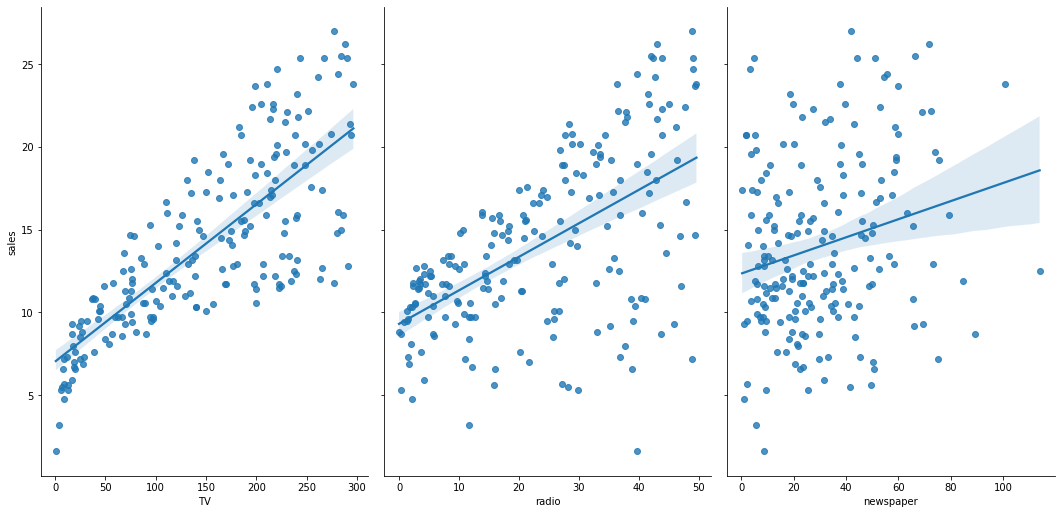

In [17]:
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7,kind='reg')

In [18]:
feature_cols=['TV','radio','newspaper']
X=data[feature_cols]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [19]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [20]:
y=data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [21]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


# Splitting X and y into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
#test_size default as 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Linear regression in scikit-learn

In [26]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [34]:
print(list(zip(feature_cols,linreg.coef_)))
#an additional $1000 spent on TV ads is associated with an increase in sales of 46.6 items

[('TV', 0.04656456787415028), ('radio', 0.17915812245088836), ('newspaper', 0.0034504647111804347)]


# Model evaluation metric for regression

① Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [39]:
#calculate MAE by hand
true=[100,50,30,20]
pred=[90,50,50,30]
print((10+0+20+10)/4)

#calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


② Mean Squared Error (MSE) is the mean of the squared errors:
   -->punish larger error
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [40]:
#calculate MSE by hand
print((100+0+400+100)/4)

#calculate MSE using scikit-learn
print(metrics.mean_squared_error(true,pred))

150.0
150.0


③ Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:-->interpretable in the "y" units

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [42]:
#calculate RMSE by hand
import numpy as np
print(np.sqrt((100+0+400+100)/4))

#calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


# Computing RMSE for Sales predictions

In [44]:
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4046514230328955


# Feture selection: train/test split

In [45]:
#remove 'newspaper' columns for feature
feature_cols=['TV','radio']
X=data[feature_cols]
y=data['sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3879034699382888


# Feature selection: Cross-validation

In [49]:
#not remove 'newspaper' columns for feature
from sklearn.model_selection import cross_val_score
feature_cols=['TV','radio','newspaper']
X=data[feature_cols]
y=data['sales']
lm=LinearRegression()
scores=cross_val_score(lm,X,y,cv=10,scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [50]:
mse_scores=-scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [51]:
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [52]:
print(rmse_scores.mean())

1.6913531708051792


In [54]:
#remove 'newspaper' columns for feature
feature_cols=['TV','radio']
X=data[feature_cols]
scores=cross_val_score(lm,X,y,cv=10,scoring='neg_mean_squared_error')
print(np.sqrt(-scores).mean())

1.6796748419090766


# Improvements to cross-validation

・Repeated cross-validation

Repeat cross-validation multiple times (with different random splits of the data) and average the results

More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation
Creating a hold-out set


・"Hold out" a portion of the data before beginning the model building process

Locate the best model using cross-validation on the remaining data, and test it using the hold-out set

More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample

Feature engineering and selection within cross-validation iterations


・Normally, feature engineering and selection occurs before cross-validation

Instead, perform all feature engineering and selection within each cross-validation iteration

More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data